<a href="https://colab.research.google.com/github/kalyannith2/Deployment/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# KNN Classification
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:, 0:8]
Y = array[:, 8]


In [ ]:

kfold = KFold(n_splits=10,random_state=7,shuffle=True)


In [ ]:
model = KNeighborsClassifier(n_neighbors=20)
results = cross_val_score(model, X, Y, cv=kfold)

In [ ]:
print(results.mean())

0.7604237867395763


### Grid Search for Algorithm Tuning

In [ ]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
filename = 'pima-indians-diabetes.data.csv'
names = [
    'preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'
]
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:, 0:8]
Y = array[:, 8]

In [ ]:
n_neighbors = numpy.array(range(1,41))
param_grid = dict(n_neighbors=n_neighbors)

In [ ]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40])})

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.7578558696205755
{'n_neighbors': np.int64(14)}


### Visualizing the CV results

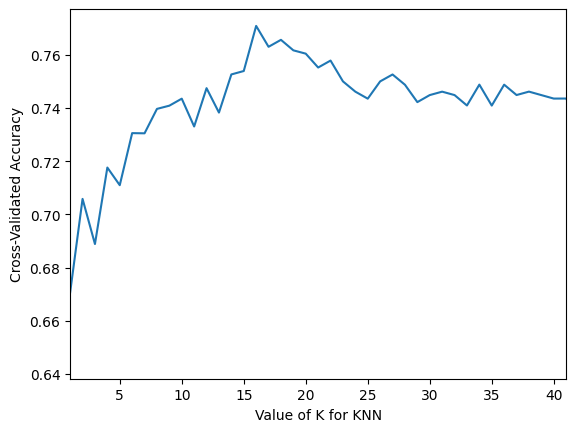

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    kfold=KFold(n_splits=10,random_state=7,shuffle=True)
    scores = cross_val_score(knn, X, Y, cv=kfold)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xlim(1,41)
plt.show()

In [ ]:
best_k_val=k_scores.index(max(k_scores))
best_score=max(k_scores)
print(best_k_val+1,best_score)

16 0.7708475734791524


In [ ]:
knn = KNeighborsClassifier(n_neighbors=16)
kfold=KFold(n_splits=10,random_state=7,shuffle=True)
scores = cross_val_score(knn, X, Y, cv=kfold)
scores.mean()

np.float64(0.7708475734791524)